# **Скачиваем данные**

In [3]:
! git clone https://github.com/Vova2808/AI_ARROW2024_Junior_Task_R.git

Cloning into 'AI_ARROW2024_Junior_Task_R'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/AI_ARROW2024_Junior_Task_R/Fish.csv')

In [6]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


array([[<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Length1'}>],
       [<Axes: title={'center': 'Length2'}>,
        <Axes: title={'center': 'Length3'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Width'}>]], dtype=object)

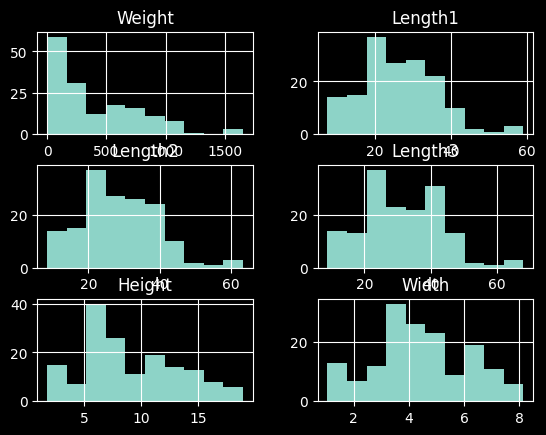

In [18]:
df.hist()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

#**ML (CatboostRegressor)**

In [9]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.5 MB/s eta 0:00:00


In [10]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [11]:
train, test = train_test_split(df,train_size=0.6,random_state=42)

In [12]:
val, test = train_test_split(test,train_size=0.5,random_state=42)

In [13]:
len(df)

159

In [14]:
len(train)

95

In [15]:
len(test)

32

In [16]:
len(val)

32

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 67 to 102
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  95 non-null     object 
 1   Weight   95 non-null     float64
 2   Length1  95 non-null     float64
 3   Length2  95 non-null     float64
 4   Length3  95 non-null     float64
 5   Height   95 non-null     float64
 6   Width    95 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.9+ KB


In [19]:
X = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height']

cat_features = ['Species']

y = ['Width']

In [20]:
model = CatBoostRegressor(cat_features=cat_features,
                          eval_metric='MAE',
                          random_seed=42,
                          verbose=100)

In [21]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

Learning rate set to 0.035188
0:	learn: 1.2748110	test: 1.4201988	best: 1.4201988 (0)	total: 48.6ms	remaining: 48.5s
100:	learn: 0.2263060	test: 0.3248262	best: 0.3248262 (100)	total: 310ms	remaining: 2.75s
200:	learn: 0.1446044	test: 0.2387808	best: 0.2386041 (199)	total: 708ms	remaining: 2.81s
300:	learn: 0.1141966	test: 0.2400333	best: 0.2369445 (226)	total: 975ms	remaining: 2.26s
400:	learn: 0.0933765	test: 0.2352016	best: 0.2351553 (399)	total: 1.78s	remaining: 2.67s
500:	learn: 0.0810118	test: 0.2313056	best: 0.2313009 (499)	total: 2.62s	remaining: 2.61s
600:	learn: 0.0715344	test: 0.2296605	best: 0.2289477 (539)	total: 3.03s	remaining: 2.01s
700:	learn: 0.0603334	test: 0.2291100	best: 0.2285810 (681)	total: 3.47s	remaining: 1.48s
800:	learn: 0.0521993	test: 0.2303116	best: 0.2285810 (681)	total: 4.02s	remaining: 999ms
900:	learn: 0.0465340	test: 0.2291163	best: 0.2285810 (681)	total: 4.43s	remaining: 487ms
999:	learn: 0.0418482	test: 0.2292896	best: 0.2285810 (681)	total: 4.51s	

In [22]:
test['pred'] = model.predict(test[X])

In [23]:
test['pred_abs'] = abs(test['pred'])

In [24]:
test['error'] = test['pred'] - test['Width']

<Axes: >

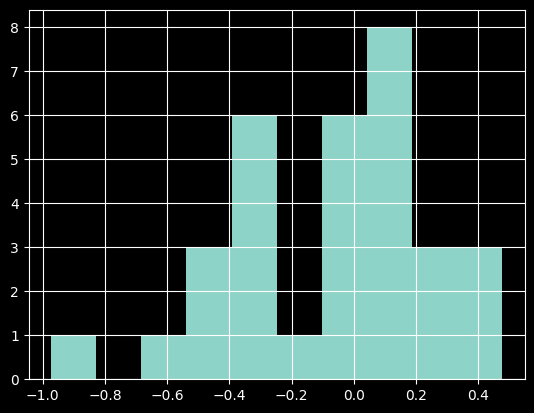

In [25]:
test['error'].hist()

In [28]:
test.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,pred,pred_abs,error
109,Perch,514.0,30.5,32.8,34.0,10.0300,6.0180,6.102925,6.102925,0.084925
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957,3.477207,3.477207,0.081507
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234,3.055597,3.055597,-0.067803
66,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944,3.339813,3.339813,0.045413
29,Bream,1000.0,33.5,37.0,42.6,18.9570,6.6030,6.508540,6.508540,-0.094460


In [26]:
test['error'].mean()

-0.07036873443175062

In [27]:
test['error'].abs().mean()

0.24942756368505198

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Width'], test['pred']))
print(f"RMSE: {rmse:.2f}")

# Calculate MAE
mae = mean_absolute_error(test['Width'], test['pred'])
print(f"MAE: {mae:.2f}")

# Calculate R2 score
r2 = r2_score(test['Width'], test['pred'])
print(f"R2 score: {r2:.2f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['Width'] - test['pred']) / test['Width'])) * 100
print(f"MAPE: {mape:.2f}%")

RMSE: 0.32
MAE: 0.25
R2 score: 0.96
MAPE: 5.26%


In [36]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 5.5 MB/s eta 0:00:00


In [37]:
import shap
shap.initjs()

In [38]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [39]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

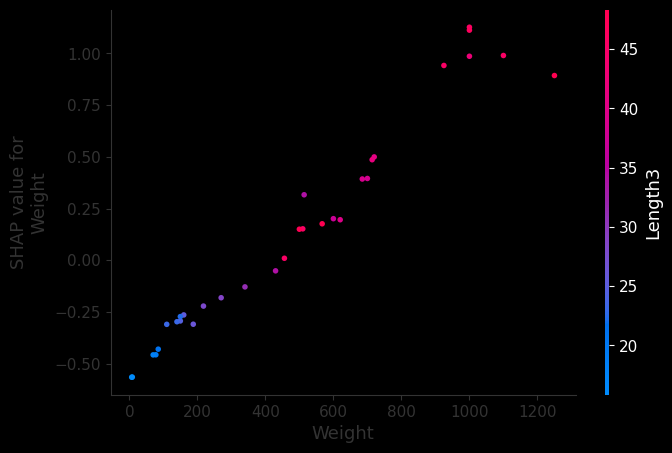

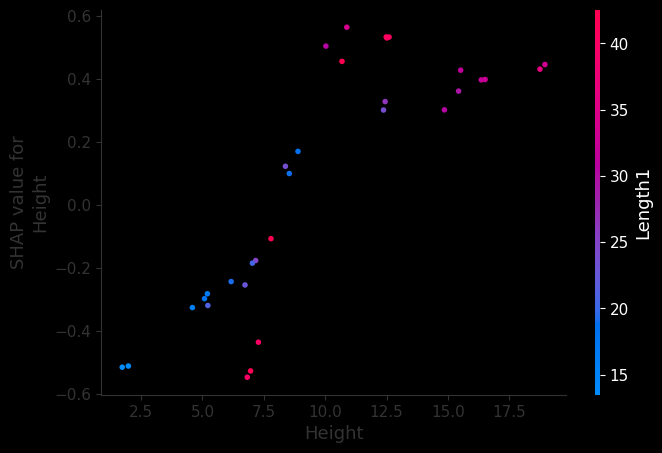

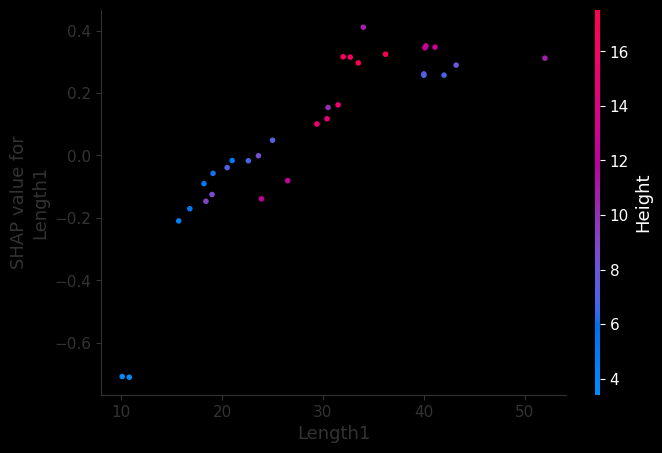

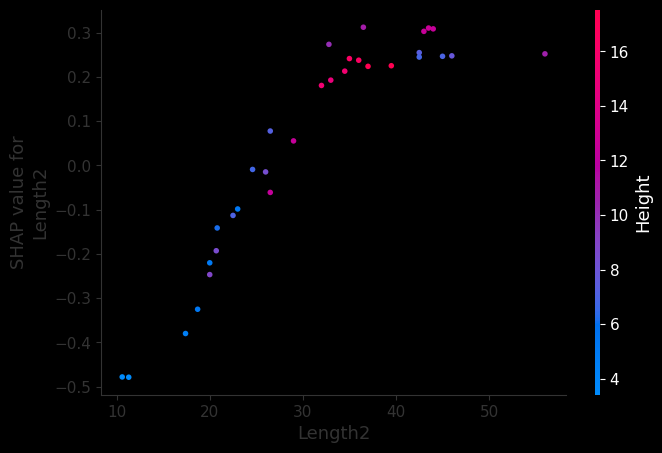

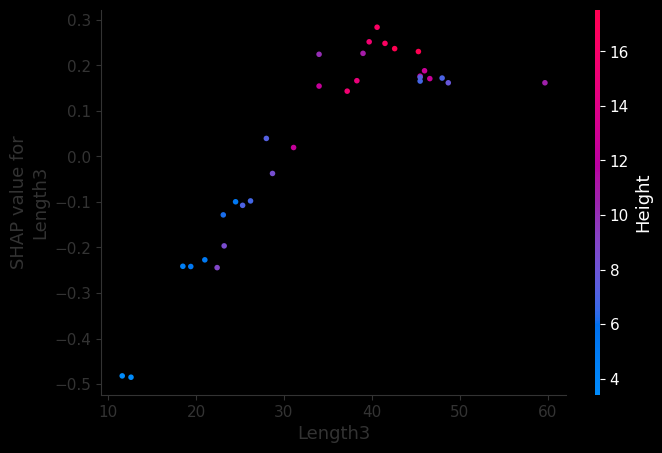

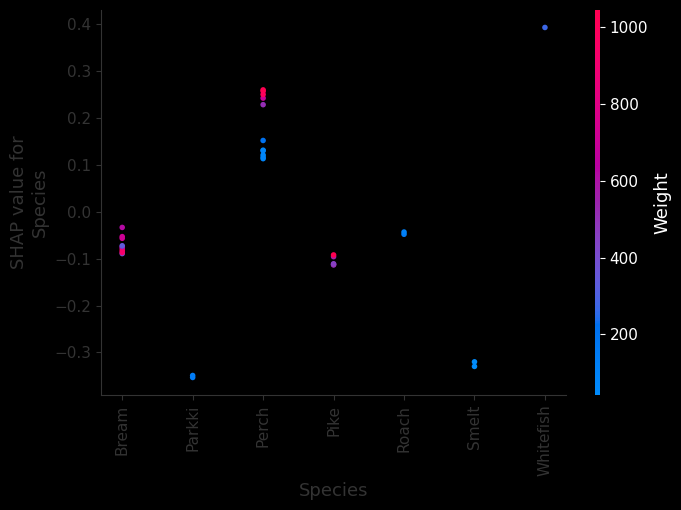

In [40]:
for feature in features:
  shap.dependence_plot(feature, shap_values, test[X])

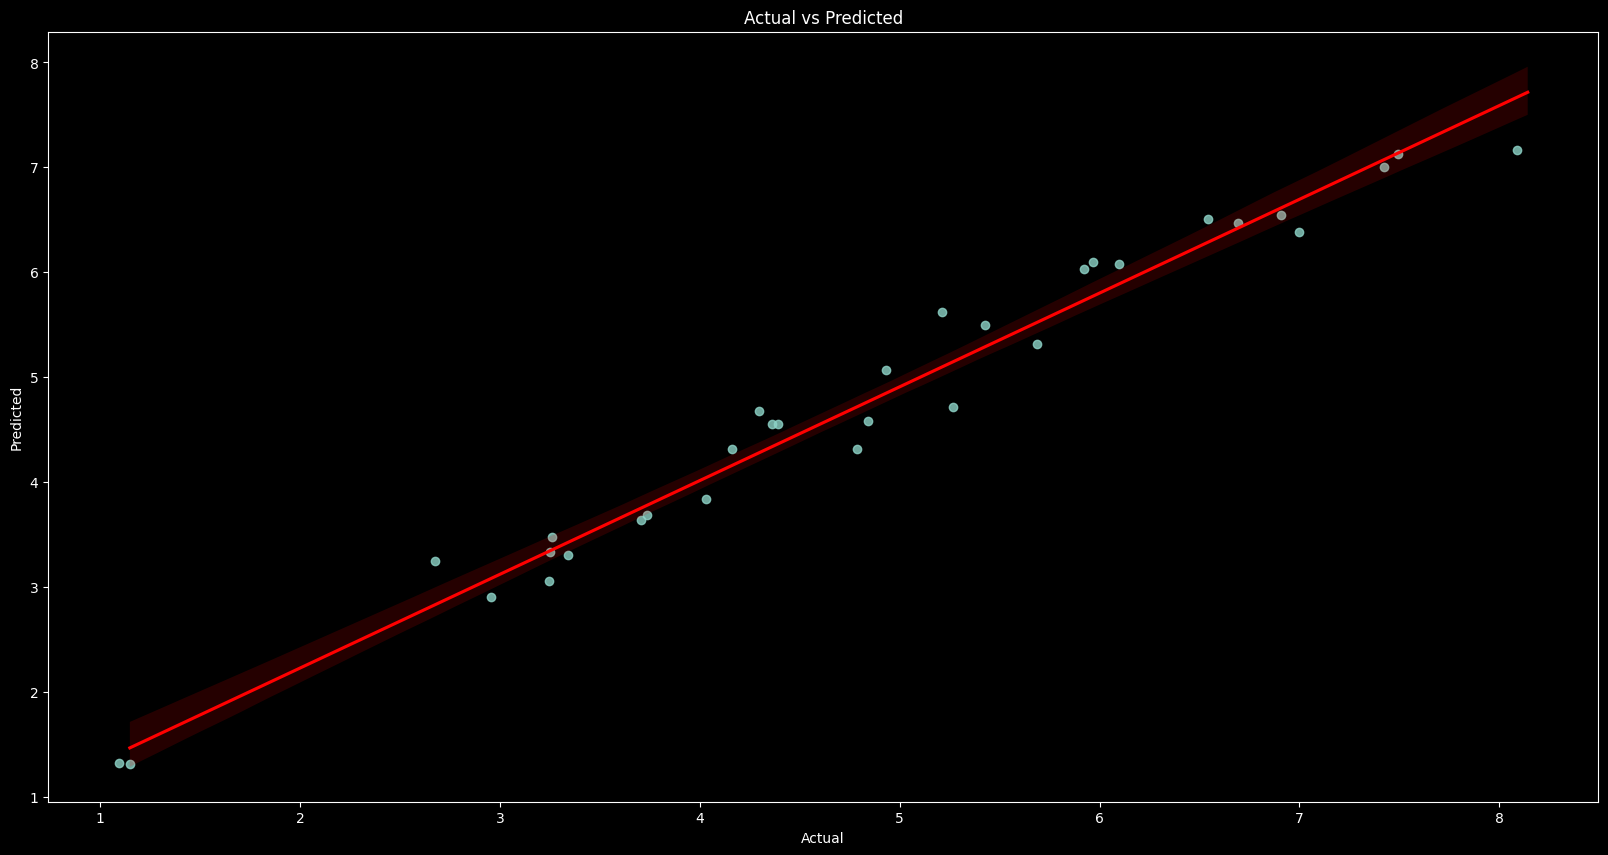

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
sns.regplot(data=df, x=test['Width'], y=test['pred'], x_jitter=.15, line_kws=dict(color="r"),)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.ticklabel_format(style = 'plain')